In [1]:
import diplib as dip
import matplotlib.pyplot as plt
import numpy as np
import os

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [2]:
root = 'images'

In [3]:
images = {}
for fn in os.listdir(root):
    images[fn] = dip.ImageReadTIFF(os.path.join(root, fn))

In [332]:
img = images['w8t1t2_d7_03.tif']
img = (img - np.min(img)) / (np.max(img) - np.min(img)) # rescale to 0..1
blues = np.array(img)[:, :, 2]
blue_img = dip.Image(blues)
smooth_blue = dip.ConvolveFT(blue_img, np.ones((5, 5)))
segmented = dip.OtsuThreshold(smooth_blue)


In [334]:
labeled = dip.Label(segmented, connectivity=1, minSize=100)
msr = dip.MeasurementTool.Measure(labeled, blue_img, ['Gravity', 'Size'])

size_max = msr[1]['Size'][0]
size_argmax = 1

for i in range(2, msr.NumberOfObjects()):
    if msr[i]['Size'][0] > size_max:
        size_max = msr[i]['Size'][0]
        size_argmax = i

y, x = np.array(msr[size_argmax]['Gravity']).astype(int)
mask = np.zeros(img.Sizes()[::-1])
mask[x-5:x+5, y-5:y+5] = 1  
mask = dip.Image(mask)
mask = dip.FixedThreshold(mask, 0.5)
filtered = dip.BinaryPropagation(mask, segmented)

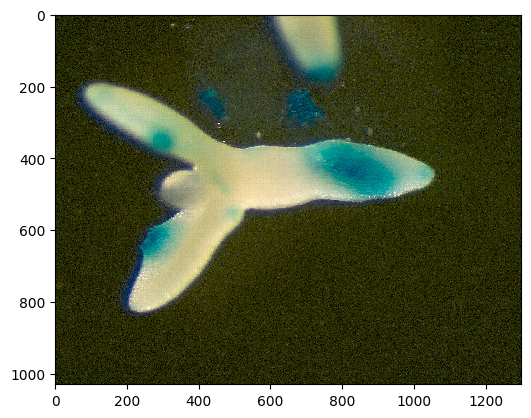

In [336]:
img.Show()